Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('student-mat.csv')

In [2]:
# Inspect missing values
data.isnull().sum()
# len(data)
# yay, no missing values !

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [99]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [100]:
data.info()
# data types: object and int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [101]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [102]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

In [103]:
categorical_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [104]:
numeric_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

----

## Data Summary and Observations:
Missing Data: none !! can you believe it !??!?!?!  
Data preparations: separate data between numerical and categorical  
Data Types: object and integers  

### Issues:
need to be aware of the columns and the values they were converted from  
example: travel time (1-4) meaning: (1) less than 15 minutes, (2) between 15-30 minutes, (3) 30 mins - 1 hour, (4) more than 1 hour

### Target Variables:
Primary targets: student grades and alcohol consumption  
Secondary targets: parents education, parents job, family support, school support  

### other notes:
EDA on kaggle has a lot of examples  
predicts grades using other columns that isn't related to alcohol consumption

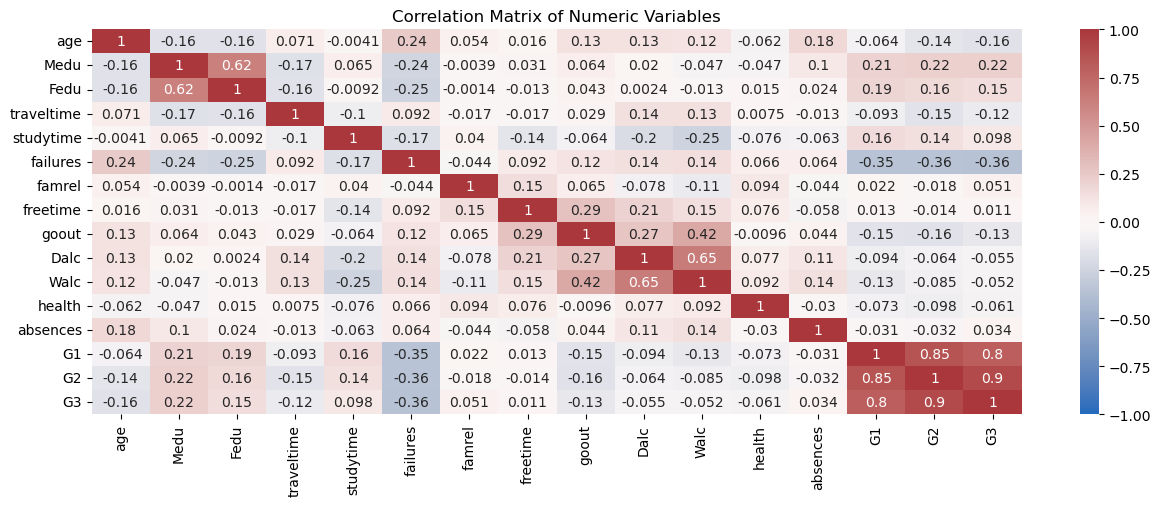

In [105]:
# Correlation matrix heatmap
plt.figure(figsize=(15, 5))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, vmin=-1,vmax=1,cmap="vlag",center=0,annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

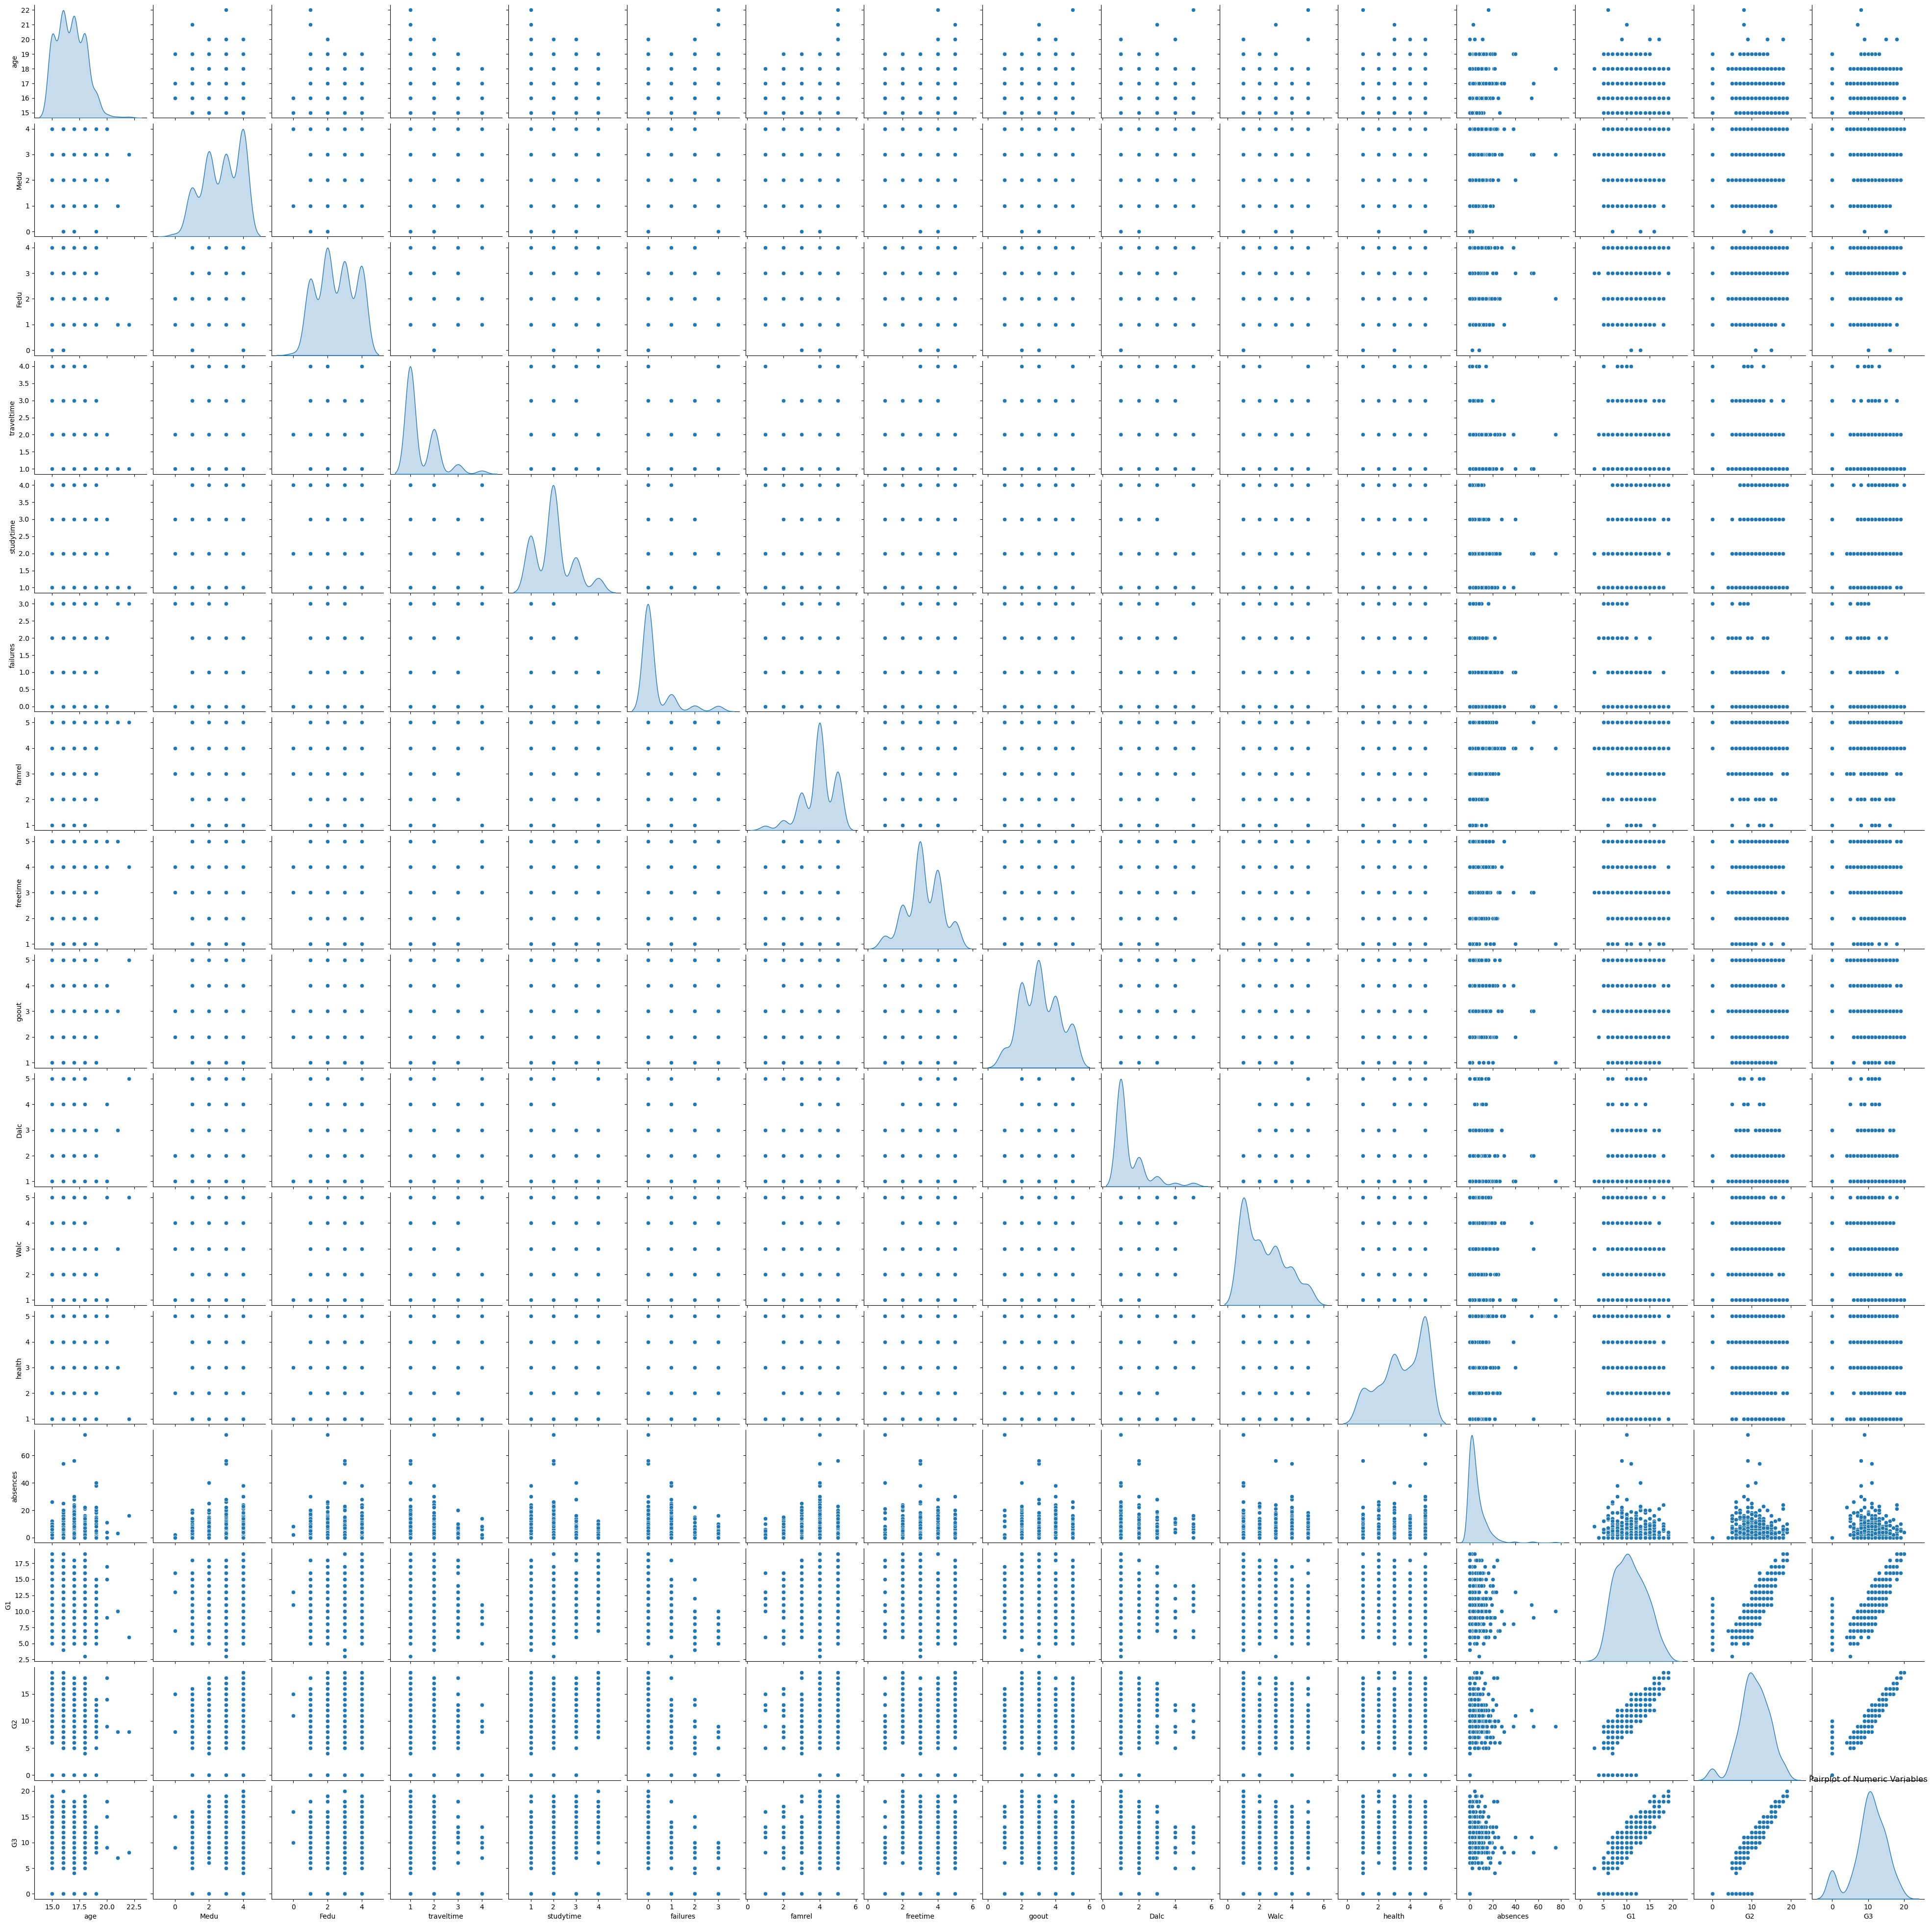

In [10]:
# Pairplot to visualize pairwise relationships for numeric variables
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.title('Pairplot of Numeric Variables')
plt.show()

------  
primary question: use alcohol to predict grades?  
secondary question: use external support (parents education, famsup, schoolsup, etc.) to predict grades?  
secondary question: use external support (parents education, famsup, schoolsup, etc.) to predict alcohol consumption?  

------

changing some "categorical data" into numerical (binary)

In [3]:
# encode famsup and schoolsup
# NOTE: make sure to only run it ONCE !
# run this line if u have to reset the data:
#data = pd.read_csv('student-mat.csv')

binary_encoder = {
    'yes':1,
    'no':0,
    }

# famsup
fam_sup_binary = data['famsup'].map(binary_encoder)
data['famsup'] = fam_sup_binary

# schoolsup
school_sup_binary = data['schoolsup'].map(binary_encoder)
data['schoolsup'] = school_sup_binary

# paid
paid_binary = data['paid'].map(binary_encoder)
data['paid'] = paid_binary

# activities
activities_binary = data['activities'].map(binary_encoder)
data['paid'] = activities_binary

# nusery
nusery_binary = data['nursery'].map(binary_encoder)
data['nursery'] = nusery_binary

# higher
higher_binary = data['higher'].map(binary_encoder)
data['higher'] = higher_binary

# internet
internet_binary = data['internet'].map(binary_encoder)
data['internet'] = internet_binary

# romantic 
romantic_binary = data['romantic'].map(binary_encoder)
data['romantic'] = romantic_binary

In [107]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [108]:
#data.to_csv('numeric_alcohol.csv')

In [4]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

In [110]:
categorical_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'activities']

In [111]:
numeric_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

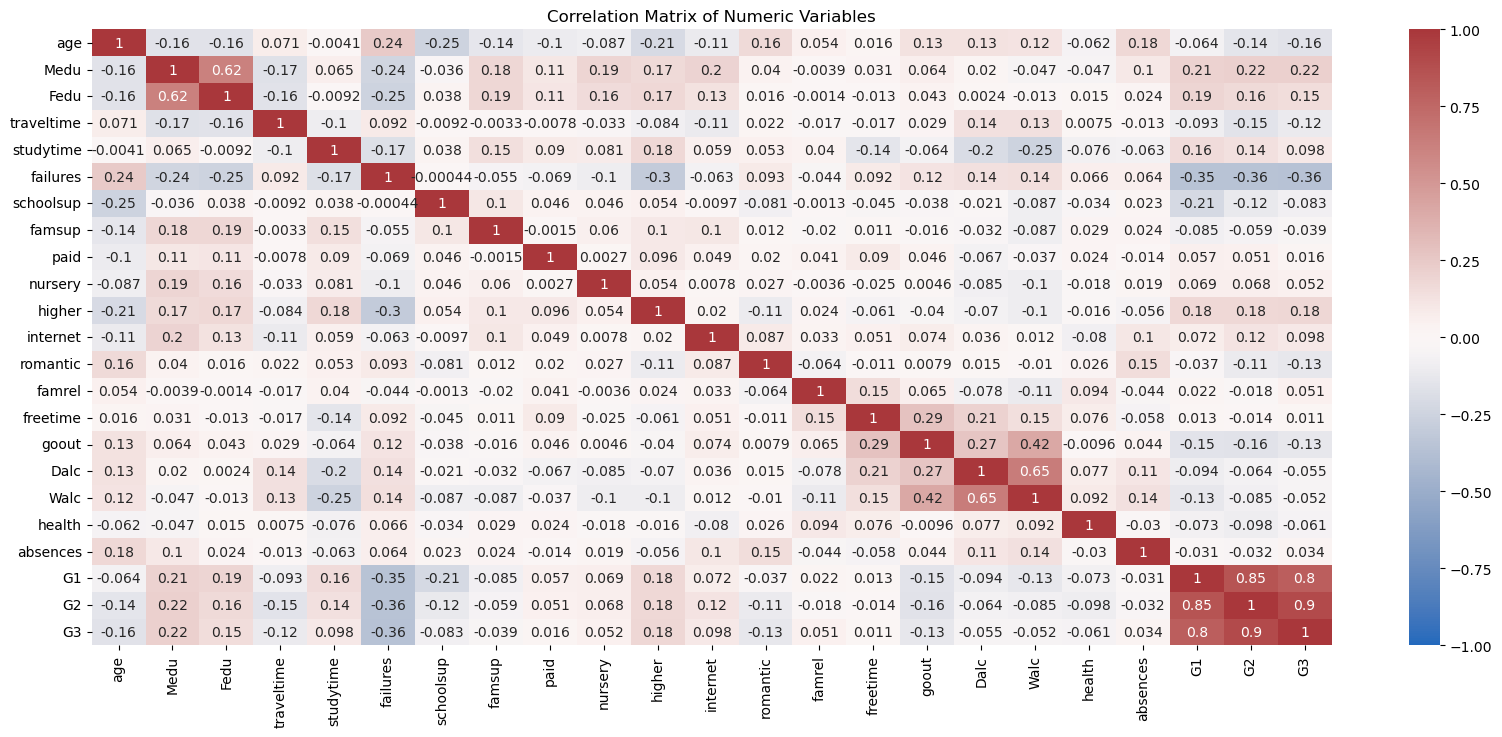

In [15]:
# Correlation matrix heatmap
plt.figure(figsize=(20, 8))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, vmin=-1,vmax=1,cmap="vlag",center=0,annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

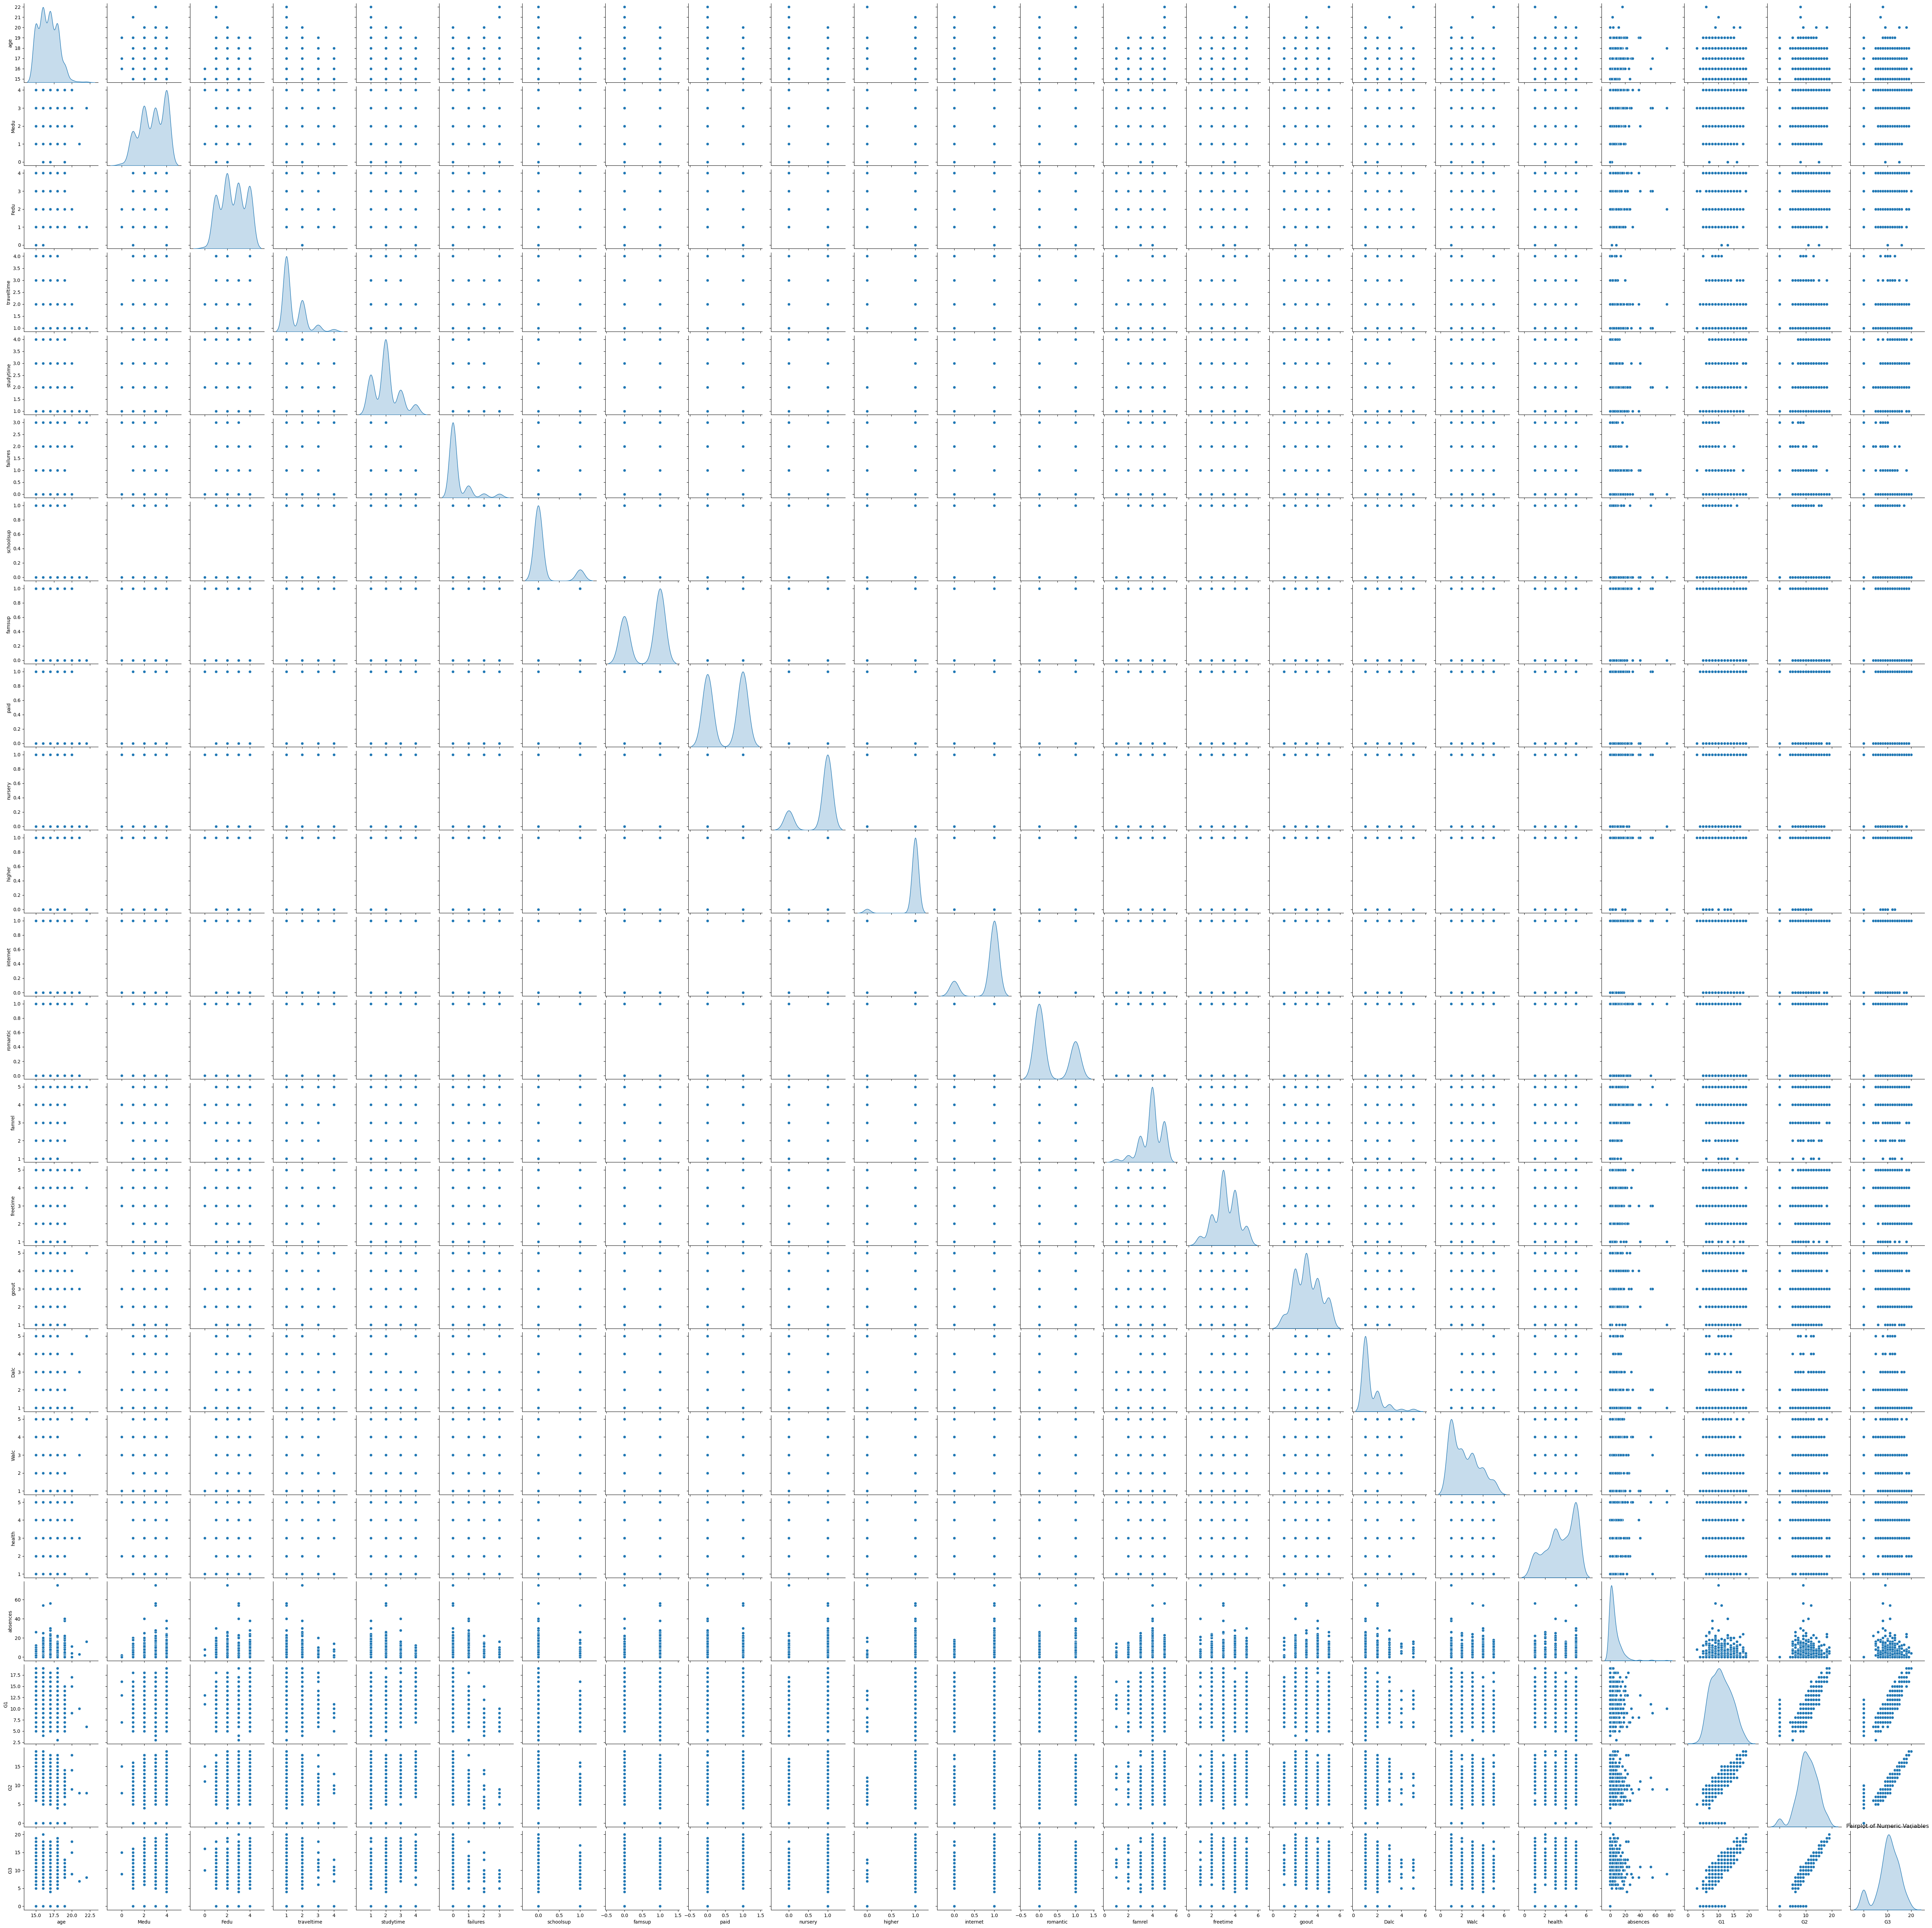

In [51]:
# Pairplot to visualize pairwise relationships for numeric variables
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.title('Pairplot of Numeric Variables')
plt.show()

------

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [6]:
x = data[['Medu']] # reshape stuff ??????
y = data['G3']

In [7]:
len(y)

395

In [8]:
len(x)

395

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16,max_iter = 5000)

In [10]:
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [11]:
# calculate accuracy
correct = (y_pred==y_test)
ncorrect = np.sum(correct)
percentcorrect = 100*ncorrect/len(y_test)
print(percentcorrect)

11.11111111111111


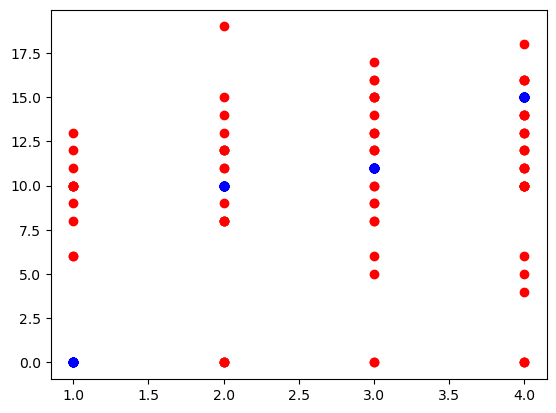

In [12]:
plt.plot(x_test,y_test,'ro')
plt.plot(x_test,y_pred,'bo')

In [13]:
y_pprob = logreg.predict_proba(x_test)

<Axes: ylabel='Count'>

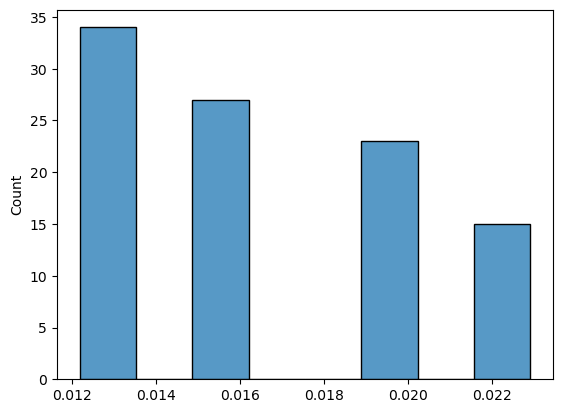

In [14]:
sns.histplot(y_pprob[:,1])

-----

In [122]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [123]:
x = data[numeric_cols]
x = x.drop(['G1','G2','G3'], axis=1)#.astype('float64')
y = data['G3']

In [124]:
# lasso
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test) 

0.01103355822568608


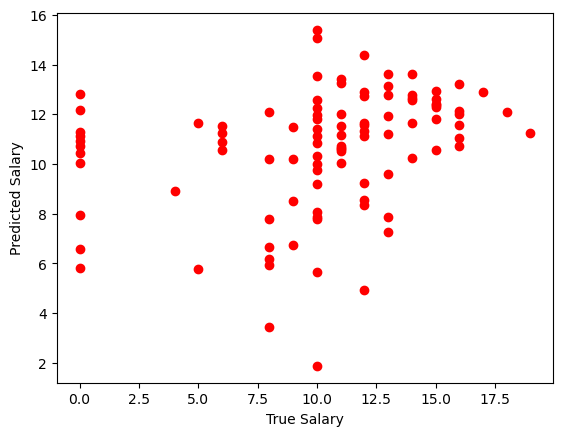

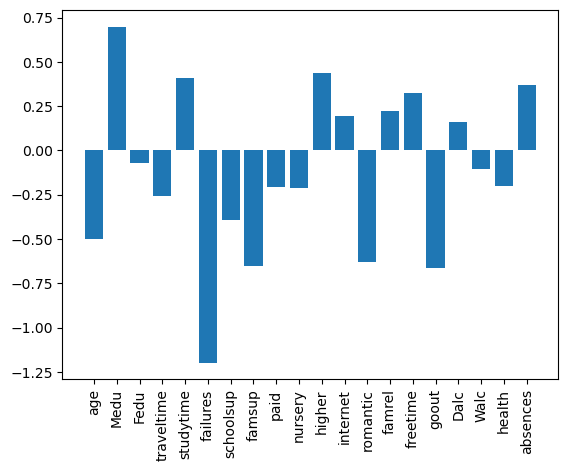

In [125]:
reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)
print(score)
plt.figure()
plt.plot(y_test,y_pred,'ro')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.show()
plt.figure()
plt.bar(x.columns,reg.coef_)
plt.xticks(rotation= "vertical")
plt.show()

In [126]:
lassocv = LassoCV(alphas=None, cv=5, max_iter=10000)
lassocv.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000)

In [127]:
lasso = Lasso(max_iter = 10000)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso.score(X_train,y_train)

0.21843149771031578

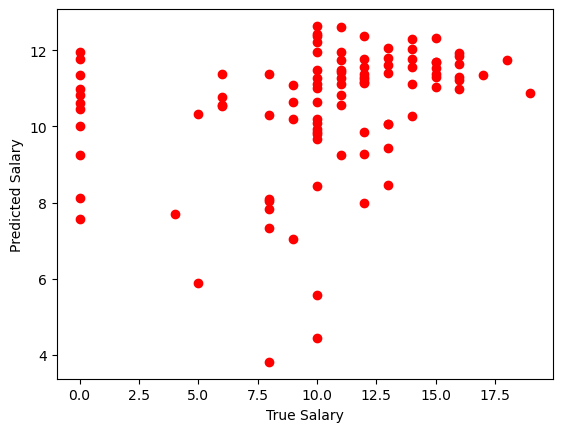

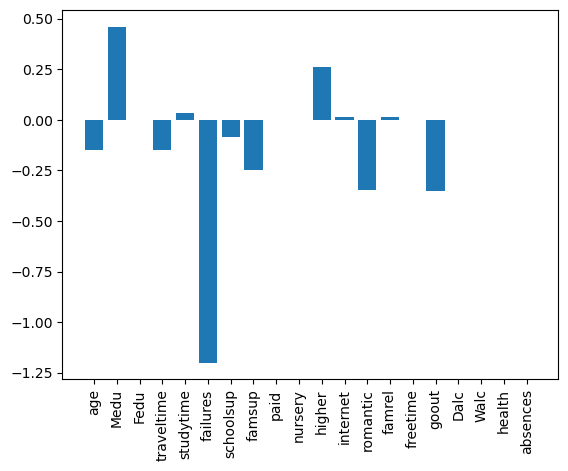

In [128]:
plt.figure()
plt.plot(y_test,y_pred,'ro')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.show()
plt.figure()
plt.bar(x.columns,lasso.coef_)
plt.xticks(rotation= "vertical")
plt.show()

-----

In [129]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [134]:
x = data[numeric_cols]
x = x.drop(['Walc','Dalc'], axis=1)#.astype('float64')
y = data['Dalc']

In [135]:
# lasso
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test) 

0.11278076418242244


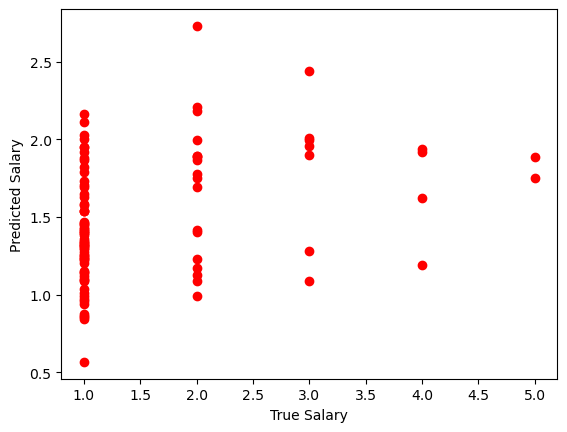

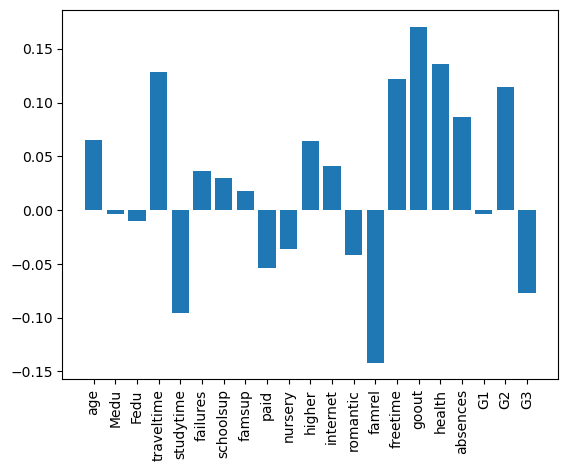

In [136]:
reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)
print(score)
plt.figure()
plt.plot(y_test,y_pred,'ro')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.show()
plt.figure()
plt.bar(x.columns,reg.coef_)
plt.xticks(rotation= "vertical")
plt.show()

In [137]:
lassocv = LassoCV(alphas=None, cv=5, max_iter=10000)
lassocv.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000)

In [138]:
lasso = Lasso(max_iter = 10000)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso.score(X_train,y_train)

0.14853208843902055

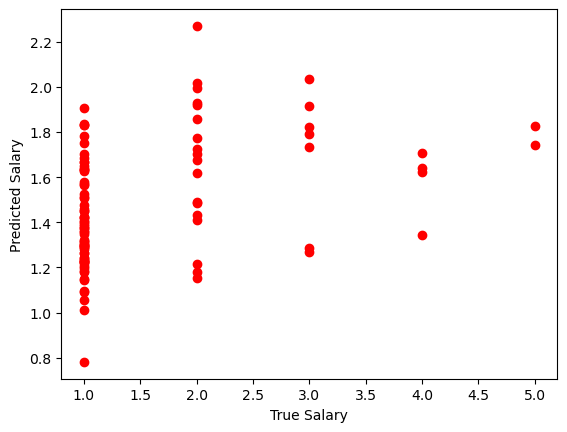

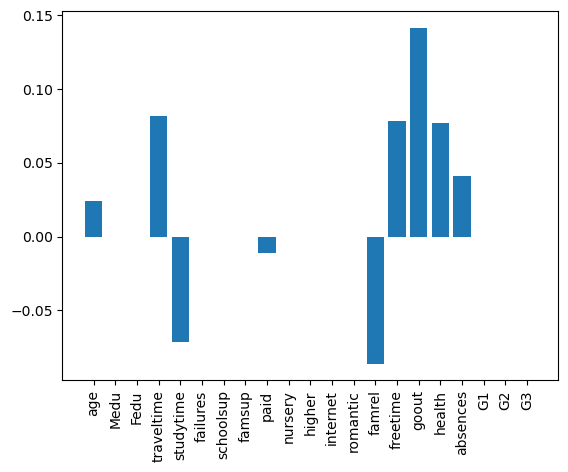

In [139]:
plt.figure()
plt.plot(y_test,y_pred,'ro')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.show()
plt.figure()
plt.bar(x.columns,lasso.coef_)
plt.xticks(rotation= "vertical")
plt.show()

---------

what if i scaled all the data before throw it into any model

In [16]:
ss = StandardScaler()
data_scaled = ss.fit_transform(data[numeric_cols])
#data_scaled

In [17]:
x = data_scaled
x = x.drop(['G1','G2','G3'], axis=1)    # drop G1 and G2 because of the high correlation with G3
y = data_scaled['G3']

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

In [ ]:
lassocv = LassoCV(alphas=None, cv=5, max_iter=10000)
lassocv.fit(X_train, y_train)
lasso = Lasso(max_iter = 10000)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso.score(X_train,y_train)

In [ ]:
plt.figure()
plt.bar(x.columns,lasso.coef_)
plt.xticks(rotation= "vertical")
plt.show()

yea, just kidding

-----